### Customer Segmentation Using UK Retail Sales Data

Customer Segmentation using RFM Analysis

__Abstract/Motivation:__

To learn to and showcase customer segmentation using RFM (Recency, Frequency, Monatary) Analysis.

__Dataset:__

[Retail](http://archive.ics.uci.edu/ml/datasets/online+retail) dataset. This is a transnational data set which contains all (541,909) the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

__Machline Learning Algorithms:__

None. This is an exercise in segmentation.

__Quantitative Assessments:__

RFM summary and visualizations showcasing segmented customer bins.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

data = pd.read_excel("Online Retail.xlsx")

Let's do some exploratory data analysis to really understand what we are dealing with. Then we can check for null and duplicates values then determine what we want to focus on.

In [2]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data = data[pd.notnull(data['CustomerID'])]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [8]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [10]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 541768
Data columns (total 2 columns):
Country       4380 non-null object
CustomerID    4380 non-null float64
dtypes: float64(1), object(1)
memory usage: 102.7+ KB


Next, let's look at the retail data from a geographic (Country) perspective, choose what we want to work with then check for negative values.

United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Channel Islands            9
Australia                  9
Netherlands                9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Israel                     4
Greece                     4
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Lithuania                  1
Czech Republic             1
European Community         1
Iceland                    1
Brazil                     1
Saudi Arabia               1
Singapore     

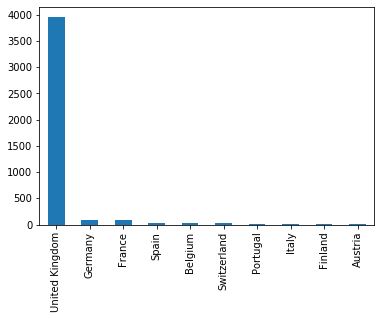

In [11]:
display(filtered_data['Country'].value_counts())
filtered_data['Country'].value_counts()[:10].plot(kind='bar')

In [12]:
uk_data=data[data['Country']=='United Kingdom']

In [13]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      361878 non-null object
StockCode      361878 non-null object
Description    361878 non-null object
Quantity       361878 non-null int64
InvoiceDate    361878 non-null datetime64[ns]
UnitPrice      361878 non-null float64
CustomerID     361878 non-null float64
Country        361878 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [14]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
uk_data[(uk_data['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [16]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [17]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


Now that we have preprocessed our data, let's choose the columns that we want to do our RFM analysis.

In [18]:
uk_data1 = uk_data[['CustomerID','InvoiceNo','Quantity','UnitPrice']]
uk_data1.describe()

,CustomerID,Quantity,UnitPrice
count,354345.000000,354345.000000,354345.000000
mean,15552.436219,12.048913,2.963793
std,1594.546025,190.428127,17.862067
min,12346.000000,1.000000,0.000000
25%,14194.000000,2.000000,1.250000
50%,15522.000000,4.000000,1.950000
75%,16931.000000,12.000000,3.750000
max,18287.000000,80995.000000,8142.750000


In [19]:
uk_data2 = uk_data.drop(columns=['StockCode', 'Description','InvoiceDate','Country'])
uk_data2.describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [20]:
uk_data = uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

I have segmented it in multiple ways, but ultimately chose the last method as my DataFrame is ordered in the way I want, leading with Customer ID, then Invoice, Quantity and finally Unit price. Next we calculate a new column with a total price for our __monetary analysis__. Then convert the dates and set a present date as one day after the max date in the dataset, so that we can compare all transaction dates to it for our __recency analysis__.

In [21]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [22]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [23]:
uk_data['InvoiceDate'].head(10)

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
5   2010-12-01 08:26:00
6   2010-12-01 08:26:00
7   2010-12-01 08:28:00
8   2010-12-01 08:28:00
9   2010-12-01 08:34:00
Name: InvoiceDate, dtype: datetime64[ns]

In [24]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])
uk_data['InvoiceDate'].head(10)

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
5   2010-12-01 08:26:00
6   2010-12-01 08:26:00
7   2010-12-01 08:28:00
8   2010-12-01 08:28:00
9   2010-12-01 08:34:00
Name: InvoiceDate, dtype: datetime64[ns]

In [25]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


Next we group our data by CustomerID and aggregate every invoice date, invoice number and total price.

In [26]:
rfm = uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                         'InvoiceNo': lambda num: len(num),
                                         'TotalPrice': lambda price: price.sum()})
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [27]:
# change the name of columns

rfm.columns=['monetary','recency','frequency']
rfm.columns

Index(['monetary', 'recency', 'frequency'], dtype='object')

In [28]:
rfm.head()

,monetary,recency,frequency
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [29]:
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,monetary,recency,frequency
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


After making the necessary data type castings, let's segment the recency, frequency and monetary into quantile bins.

In [30]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])
rfm.head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,1
12747.0,2,103,4196.01,4,1,4
12748.0,0,4596,33719.73,4,1,4
12749.0,3,199,4090.88,4,1,4
12820.0,3,59,942.34,3,2,4


Finally, to be able to rank out customers easily for either recency, frequency or monetary values, lets convert each ranking into a string that we can easily search to target certain customers.

In [31]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+rfm.f_quartile.astype(str)+rfm.m_quartile.astype(str)
rfm.head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,1,111
12747.0,2,103,4196.01,4,1,4,414
12748.0,0,4596,33719.73,4,1,4,414
12749.0,3,199,4090.88,4,1,4,414
12820.0,3,59,942.34,3,2,4,324


In [32]:
# Filter out Top/Best customers

rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
16754.0,372,2,2002.4,1,1,1,111
12346.0,325,1,77183.6,1,1,1,111
15749.0,235,10,44534.3,1,1,1,111
16698.0,226,5,1998.0,1,1,1,111
13135.0,196,1,3096.0,1,1,1,111
